<a href="https://colab.research.google.com/github/Thachhcmute3001/AI/blob/main/Flower_Detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array
import numpy as np
from sklearn.model_selection import train_test_split
from keras.datasets import cifar100
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization
from keras.models import Sequential, Model
from keras import Input
from keras.layers import LeakyReLU
from keras.optimizers import Adam

In [2]:
from numpy import asarray

folder = '/content/drive/MyDrive/Flower/'
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('apricot'):
    output = 0
  if file.startswith('daisy'):
    output = 1
  if file.startswith('lotus'):
    output = 2
  if file.startswith('rose'):
    output = 3
  if file.startswith('waterlily'):
    output = 4
  photo = load_img(folder + file, target_size=(200, 200))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/AI_Lesson/Flower/Flower_photos.npy', photos)
save('/content/drive/MyDrive/AI_Lesson/Flower/Flower_labels.npy', labels)

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


(3504, 200, 200, 3) (3504,)


In [3]:
# Load images and labels
from keras.utils import to_categorical #one hot encoding
photos = np.load('/content/drive/MyDrive/AI_Lesson/Flower/Flower_photos.npy')
labels = np.load('/content/drive/MyDrive/AI_Lesson/Flower/Flower_labels.npy')
labels_one_hot = to_categorical(labels)
x_train, x_test, y_train, y_test = train_test_split(photos, labels_one_hot, test_size = 0.3, random_state = 100)

In [4]:
model = Sequential()
#Convolutional
model.add(Conv2D(32, kernel_size= (3,3), activation= 'relu', input_shape = (200,200,3), padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(128, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(128, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(256, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(256, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

# Fully connected layers
model.add(Flatten())
model.add(Dense(1024, activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1024, activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation= 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer = Adam(), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 128)       1

In [5]:
from keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.1,
    rescale=1./255,
	width_shift_range=0.1,
    height_shift_range=0.1,
	horizontal_flip=True,
    brightness_range=[0.2,1.5], fill_mode="nearest")


In [8]:
train = model.fit_generator(aug.flow(x_train, y_train, batch_size=64),
                               epochs=40,
                               validation_data=aug.flow(x_test,y_test,
                               batch_size=len(x_test)))

<ipython-input-8-2c583d38e841>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  train = model.fit_generator(aug.flow(x_train, y_train, batch_size=64),


Epoch 1/40
39/39 [==============================] - 47s 1s/step - loss: 0.4131 - accuracy: 0.8495 - val_loss: 0.6542 - val_accuracy: 0.7842
Epoch 2/40
39/39 [==============================] - 39s 1s/step - loss: 0.4324 - accuracy: 0.8373 - val_loss: 0.5469 - val_accuracy: 0.8137
Epoch 3/40
39/39 [==============================] - 36s 928ms/step - loss: 0.4360 - accuracy: 0.8430 - val_loss: 0.5543 - val_accuracy: 0.8070
Epoch 4/40
39/39 [==============================] - 38s 974ms/step - loss: 0.4083 - accuracy: 0.8573 - val_loss: 0.6043 - val_accuracy: 0.8023
Epoch 5/40
39/39 [==============================] - 37s 966ms/step - loss: 0.3881 - accuracy: 0.8532 - val_loss: 0.5245 - val_accuracy: 0.8203
Epoch 6/40
39/39 [==============================] - 39s 1s/step - loss: 0.3909 - accuracy: 0.8552 - val_loss: 0.5661 - val_accuracy: 0.8089
Epoch 7/40
39/39 [==============================] - 36s 918ms/step - loss: 0.3480 - accuracy: 0.8670 - val_loss: 0.5426 - val_accuracy: 0.8184
Epoch 8/

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Accuracy:", test_acc)
print('Loss:', test_loss)

33/33 [==============================] - 1s 28ms/step - loss: 66.0570 - accuracy: 0.8260
Accuracy: 0.8260456323623657
Loss: 66.05703735351562


In [10]:
#Save model
model.save('/content/drive/MyDrive/Models/Flower.h5')

In [11]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/Models/Flower.h5')

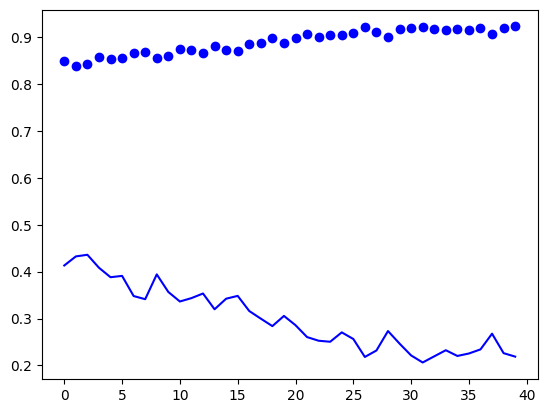

In [12]:
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label = 'Training accuracy')
plt.plot(epochs, loss, 'b', label = 'Traning loss')
plt.show()

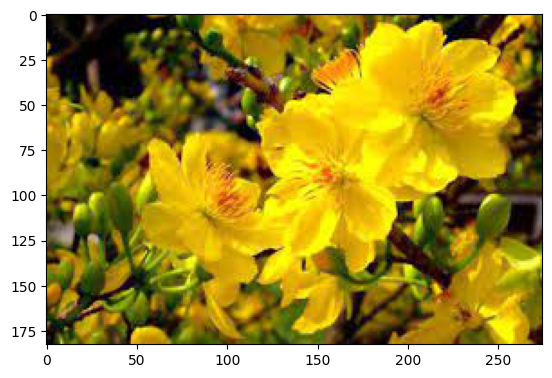

In [15]:
from keras.utils import load_img
from keras.utils import img_to_array
from pylab import *
url = 'apricot.jpg'
img = load_img(url)
imshow(img)

1/1 [==============================] - 0s 31ms/step
apricot


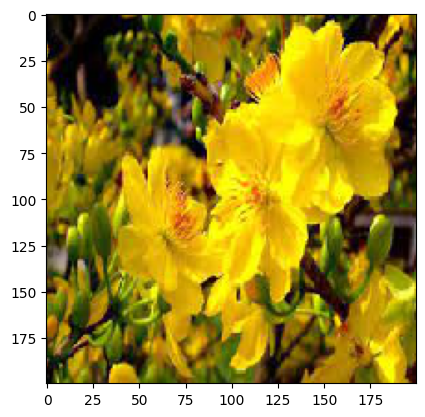

In [16]:
img = load_img(url, target_size = (200,200))
imshow(img)
img = img_to_array(img)
img = img.reshape(1,200,200,3)
img = img.astype('float32')
img = img/255
a = np.argmax(model.predict(img), axis = -1)
if(a == array([0])):
  print("apricot")
if(a == array([1])):
  print("daisy")
if(a == array([2])):
  print("lotus")
if(a == array([3])):
  print("rose")
if(a == array([4])):
  print("water lily")